## Statistical and Machine Learning, Fall 2024

### Week 1: Mathematical Building Blocks of Machine Learning	

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week1.ipynb)



### Why use machine learning?
<hr style="border:2px solid gray">

* Let's design a system for predicting *bank loan default* based on several *features*, such as income and debt

    * Classical programming: write down step-by-step instructions or rules 
    * Machine learning: figure out what the rules should be 
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/rules.png?raw=true" width=650>    

* A machine learning system is *trained* rather than being explicitly programmed
    * Benefits
        + Easier to develop/maintain 
        + Possibly more accurate
    * Challenges
        + We need features *and* responses, i.e., labeled data 
        + Can human users understand and trust these rules? 
        
* In machine learning, *data labeling* involves assigning informative labels to raw data like images, text files, or videos


* Machine learning moves beyond the confines of traditional statistical techniques and optimization algorithms
    * *Nonlinearity and complexity:* Unlike many traditional models that assume linear relationships, machine learning can capture complex, nonlinear patterns within data. 
    
    * *Adaptability and generalization:* Machine learning models are designed to adapt and improve over time as they are exposed to more data. This allows them to generalize well to new, unseen situations, making them valuable for prediction and decision-making in dynamic environments.
    
    * *Scalability to big data:* Machine learning techniques are designed to handle large volumes of data efficiently, enabling analysis that would be infeasible with traditional approaches. 
    
    * *Feature engineering and representation learning:* While traditional methods often rely on manual feature engineering, machine learning algorithms can automatically learn meaningful representations of data, reducing the burden on human experts.


### Learning rules and representations from data
<hr style="border:2px solid gray">

* Let us revisit the bank loan default example
    * We have some data points represented by their coordinates in $\mathbb{R}^2$
* Goal: develop a machine learning system that can take the coordinates $(x_1,x_2)$ of a sample and predict the label or outcome

    * We can use logistic regression to solve this classification problem and find the classification rule

<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/bank_logreg.png?raw=true" width=350>    

* What if we have a more extensive set of features? Debt, income, gender, occupation, photo, etc.
    * Most interesting applications of machine learning involve
        + High-dimensional data (e.g., thousands or millions of features)
        + High-risk, high-reward investments
    * Thus, modern machine learning (and deep learning) can be defined as finding suitable *data representations* and *mappings from inputs to outputs* using a feedback signal
    
<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/mnist_2d.png?raw=true" width=740>
    
    
    

### Multistage way to learn data representations and find mappings 
<hr style="border:2px solid gray">

* While specific implementations might vary depending on the algorithm and framework being used, here's a general overview of the training loop for machine learning models

<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/ml_general.png?raw=true" width=700>


### Categorization of machine learning algorithms based on three criteria
<hr style="border:2px solid gray">

1. Data Supervision

    * Supervised Learning
        + The algorithm is trained on labeled data, where the input data is paired with the correct output
    
    * Unsupervised Learning
       + The algorithm is trained on unlabeled data, where the goal is to find hidden patterns or structure in the data, such as clustering or dimensionality reduction
    
    *  Semi-Supervised Learning
        + This is a combination of supervised and unsupervised learning, where the algorithm is trained on a mix of labeled and unlabeled data
        
        <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/material.png?raw=true" width=600>
    
2. Model Complexity

    * Linear Models
        + These models assume a linear relationship between the input features and the output
    * Nonlinear Models
        + These models can capture more complex relationships between the inputs and outputs, such as neural networks, decision trees, etc.
    * Deep Learning
        + A subset of nonlinear models, deep learning refers to models with many layers (deep neural networks) that can learn hierarchical features
    
3. Uncertainty Spectrum

    * Deterministic Models
        + These models make predictions without accounting for predictive uncertainty
    * Conformal Prediction
        + These models provide prediction intervals/sets with minimal distributional assumptions and computational burden 
    
    * Bayesian Models
        + These models explicitly use Bayesian probability principles to handle uncertainty, typically by modeling the uncertainty as probability distributions over model parameters

### Mathematical building blocks of machine learning
<hr style="border:2px solid gray">

* Supervised learning: learn a mapping or function $f$ from inputs (features/predictors) $\mathbf{x}\in\mathcal{X}$ to outputs $\mathbf{y}\in\mathcal{Y}$. The data set is given in the form of $N$ input-output pairs $\mathcal{D}=\{(\mathbf{x}_n,\mathbf{y}_n)\}_{n=1}^N$
    + $N$ is the sample size and the number of features is $D$, i.e., $\mathcal{X}=\mathbb{R}^D$
    + Multi-class classification: $\mathcal{Y}=\{1,2,\ldots, C\}$
    + If we have two classes only (binary classification): $\mathcal{Y}=\{0,1\}$
    


### Model fitting/training
<hr style="border:2px solid gray">

* Define *empirical risk* as the average loss on the training data (denote all unknown parameters by $\boldsymbol{\theta}$)

$$ \mathcal{L}(\boldsymbol{\theta}):=\frac{1}{N}\sum_{n=1}^N l(y_n, f(\mathbf{x}_n;\boldsymbol{\theta}))$$

where $l$ denotes the loss function 
* Example: zero-one loss $l(y, \hat{y})=I(y\neq \hat{y})$, giving misclassification rate

$$I(y\neq \hat{y})=\begin{cases}1 & \text{if } y\neq \hat{y}\\0 &\text{if } y=\hat{y} \end{cases}$$

* Empirical risk minimization (ERM): find a setting of the parameters $\boldsymbol{\theta}$ that minimizes the empirical risk

$$ \underset{\boldsymbol{\theta}}{\operatorname{argmin}} \mathcal{L}(\boldsymbol{\theta})=\underset{\boldsymbol{\theta}}{\operatorname{argmin}} \frac{1}{N}\sum_{n=1}^N l(y_n, f(\mathbf{x}_n;\boldsymbol{\theta}))$$

* Note: our true goal is to minimize the expected loss on *future data* that we have not yet
seen, rather than just do well on the training set 

### Loss function for regression tasks
<hr style="border:2px solid gray">

* Since the output is real-valued, the most common choice is to use quadratic loss
$$l(y,\hat{y})=(y-\hat{y})^2$$

* Empirical risk minimization
$$MSE(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N\big(y_n - f(\mathbf{x}_n;\boldsymbol{\theta})\big)^2$$

* Underlying assumption for linear regression 
$$f(\mathbf{x};\boldsymbol{\theta})=w_0+w_1x_1+\ldots+w_Dx_D=w_0+\mathbf{w}^T\mathbf{x}$$

where $\mathbf{w}=[w_1,\ldots,w_D]\in\mathbb{R}^D$, $\mathbf{x}=[x_1,\ldots,x_D]\in\mathbb{R}^D$, $\boldsymbol{\theta}=\{w_0,\mathbf{w}\}$

### From Linear Regression to Deep Learning 
<hr style="border:2px solid gray">

* Let $\phi(\mathbf{x})$ be a feature vector derived from the input $\mathbf{x}$ 
    + For example, $\phi$ can be expressed as a composition of simpler functions
    
    $$f(\mathbf{x};\boldsymbol{\theta})=w_0+\mathbf{w}^T\phi(\mathbf{x};\mathbf{V}) $$
    where $\boldsymbol{\theta}=\{w_0,\mathbf{w}, \mathbf{V}\}$

### Generalization

<hr style="border:2px solid gray">

* Machine learning models tend to perform worse on new data than on their training data
    * The model becomes overly specialized/sensitive to the training data (e.g., noise and randomness present in the data)

* How to evaluate machine learning models and select the best one?

* Train-Test Split
    * The data set is divided into two  parts: a training set and a test set
    * The training set is used to train the machine learning model, and the test set is used to evaluate its performance on new, unseen data

    * Training risk: $\mathcal{L}_{\text{train}}:=\frac{1}{|\mathcal{D}_{\text{train}}|}\sum_{(\mathbf{x},y)\in\mathcal{D}_{\text{train}}}l(y,f(\mathbf{x};\boldsymbol{\theta}))$

    * Test risk: $\mathcal{L}_{\text{test}}:=\frac{1}{|\mathcal{D}_{\text{test}}|}\sum_{(\mathbf{x},y)\in\mathcal{D}_{\text{test}}}l(y,f(\mathbf{x};\boldsymbol{\theta}))$

    * Overfitting happens when $\mathcal{L}_{\text{test}}\gg \mathcal{L}_{\text{train}}$

    * Caveat: If you use the test set multiple times, you might end up overfitting to the test set itself
    
     <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/train_test.png?raw=true" width=280>
    

* Train-Dev-Test Split
    * Extends the concept of the train-test split by introducing a development (or validation) set
    * Training set: Used to train the model's parameters
    * Development (validation) set: Used to tune hyperparameters, assess different model architectures, and make decisions about the training process
    * Test set: Used for the final evaluation of the model's performance
    
    <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/model_selection.png?raw=true" width=420>
    
    


### Maximum Likelihood Estimation

<hr style="border:2px solid gray">

* Maximum Likelihood Estimation (MLE) is a statistical method used to *estimate* the parameters of a statistical model based on observed data

    * The likelihood function quantifies the probability of observing the given data for different parameter values

* Assume $N$ observations are independently sampled from the same distribution
$$p(\mathcal{D}|\boldsymbol{\theta})=\prod_{n=1}^N p(\mathbf{y}_n|\mathbf{x}_n,\boldsymbol{\theta})$$
* Find $\boldsymbol{\theta}$ at which the log likelihood (LL) function takes its maximum
$$\underset{\boldsymbol{\theta}}{\operatorname{argmax}} LL(\boldsymbol{\theta}), \text{where } LL(\boldsymbol{\theta}):=\log p(\mathcal{D}|\boldsymbol{\theta})= \sum_{n=1}^N \log p(\mathbf{y}_n|\mathbf{x}_n,\boldsymbol{\theta}) $$

* Instead, minimize the negative log likelihood function (NLL)
$$\underset{\boldsymbol{\theta}}{\operatorname{argmin}} - LL(\boldsymbol{\theta})=\underset{\boldsymbol{\theta}}{\operatorname{argmin}} \sum_{n=1}^N \underbrace{\big(-\log p(\mathbf{y}_n|\mathbf{x}_n,\boldsymbol{\theta})\big)}_{\text{loss function } l?}$$

### Bernoulli distribution and MLE (practice)

<hr style="border:2px solid gray">

* Probability density function (PDF) with parameter $\theta$
$$p(y|\theta)=\theta^{I(y=1)}(1-\theta)^{I(y=0)}=\begin{cases}\theta & \text{if } y=1 \\ 1-\theta & \text{if } y=0\end{cases}$$

* Given $N$ observations $y_1,\ldots,y_n$, form NLL

$$\begin{align} NLL(\theta) &= -\sum_{n=1}^N \log p(y_n|\theta) \\ & = -\sum_{n=1}^N \big[I(y_n=1)\log \theta +I(y_n=0)\log (1-\theta)\big]\\&=-\big[\big(\sum_{n=1}^N I(y_n=1)\big)\log\theta +  \big(\sum_{n=1}^N I(y_n=0)\big)\log(1-\theta)\big] \end{align}$$

### Bernoulli distribution and MLE (practice)

<hr style="border:2px solid gray">

* Given $N$ observations with $N_1$ 1's and $N_0$ 0's 

$$NLL(\theta)=-\big[N_1\log\theta +N_0\log(1-\theta)\big]$$

* Set the derivative equal to 0 to find the solution

$$\frac{d}{d\theta} NLL(\theta)=-\frac{N_1}{\theta}+\frac{N_0}{1-\theta}=0\rightarrow \hat{\theta}_{MLE}=\frac{N_1}{N}$$


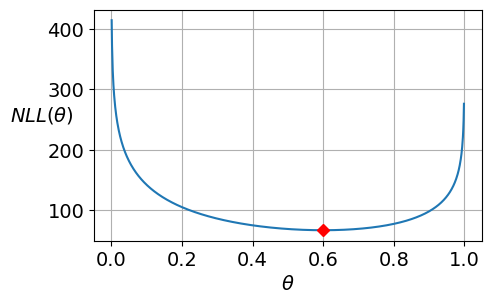

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

N0, N1 = 40, 60

def NLL(theta):
    return -(N1*np.log(theta) + N0*np.log(1-theta)) 

theta = np.linspace(0.001,0.999,1000)
plt.plot(theta, NLL(theta))
plt.plot(theta[np.argmin(NLL(theta))], np.min(NLL(theta)), 'rD')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$NLL(\theta)$', rotation=0)
plt.grid()
plt.show()

* In the `scipy.optimize` module, the `minimize` function is a versatile tool for finding the minimum value of a scalar function.

* The following calls the `minimize` function with the following arguments:

    * NLL: The function to be minimized. It should return the negative log-likelihood given theta.
    
    * initial_guess: The initial guess for the value of theta.
    
    * bounds: The bounds for theta.

In [2]:
from scipy.optimize import minimize

initial_guess = [0.5]  # initial guess

bounds = [(0.001, 0.999)]  # theta must be between 0.001 and 0.999    

result = minimize(NLL, initial_guess, bounds=bounds)

# Print the result
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 67.30116670092565
        x: [ 6.000e-01]
      nit: 5
      jac: [ 0.000e+00]
     nfev: 14
     njev: 7
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [3]:
print(result.x)

[0.6]


### Loss functions with many parameters

* Optimization in machine learning goes far beyond simple single-variable cases.  Practical models often have a multitude of parameters that need to be fine-tuned. 

    * For example, in July 2024, Meta released the biggest version of its open source Llama large language model (LLM), a 405 billion-parameter version called Llama-3.1: https://ai.meta.com/blog/meta-llama-3-1/ 

    * A token in the context of LLMs is a unit of text that the model processes. Tokens can represent words, characters, or subwords, depending on the tokenization strategy used. 
    
    <img src="https://github.com/farhad-pourkamali/MATH6388Online/blob/main/images/meta.png?raw=true" width=700>

### Further reading

* Chapter 1 of "Probabilistic Machine Learning: An Introduction" https://probml.github.io/pml-book/book1.html

* Inside the maths that drives AI: https://doi.org/10.1038/d41586-024-02185-z
    * "Loss functions measure algorithmic errors in artificial-intelligence models, but there’s more than one way to do that!"